In [2]:
import os
import pandas as pd
import numpy as np
import  utils.Data_preprocessing as dp
from utils.EDA import EDA 

import matplotlib.pyplot as plt
%matplotlib inline

import gc
gc.enable()
PATH = '../input/'
Processed = '../input/processed/'
directory = os.path.dirname(Processed)
if not os.path.exists(directory):
    os.makedirs(directory)

# Process input Files
## application_{train|test}.csv

In [2]:
#basic pre processing
application_train_df = pd.read_csv(PATH+"application_train.csv")
application_test_df = pd.read_csv(PATH+"application_test.csv")

In [3]:
# add dummy TARGET column and merge train and test df
application_test_df['TARGET'] = -999
application_df = pd.concat([application_train_df,application_test_df], ignore_index=True)

#free memomry
del application_train_df, application_test_df
gc.collect()

378

In [4]:
#Check for basci info
dp.basic_info(application_df)
dp.dataFrame_size_MB(application_df)


Num of rows and columns:  (356255, 122)
Missing value status:  True
Columns names:
 
AMT_ANNUITY
AMT_CREDIT
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
APARTMENTS_AVG
APARTMENTS_MEDI
APARTMENTS_MODE
BASEMENTAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_MODE
CNT_CHILDREN
CNT_FAM_MEMBERS
CODE_GENDER
COMMONAREA_AVG
COMMONAREA_MEDI
COMMONAREA_MODE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
ELEVATORS_AVG
ELEVATORS_MEDI
ELEVATORS_MODE
EMERGENCYSTATE_MODE
ENTRANCES_AVG
ENTRANCES_MEDI
ENTRANCES_MODE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_CONT_MOBILE
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT

331.5972900390625

In [5]:
#conver object to number
# application_df = dp.convert_Object_number(application_df)

In [6]:
#missing Data??
application_df.isnull().values.any()


True

In [7]:
dp.check_missing_data(application_df)

,Total,Percent
COMMONAREA_AVG,248360,69.714109
COMMONAREA_MODE,248360,69.714109
COMMONAREA_MEDI,248360,69.714109
NONLIVINGAPARTMENTS_MODE,246861,69.293343
NONLIVINGAPARTMENTS_AVG,246861,69.293343
NONLIVINGAPARTMENTS_MEDI,246861,69.293343
FONDKAPREMONT_MODE,243092,68.235393
LIVINGAPARTMENTS_AVG,242979,68.203674
LIVINGAPARTMENTS_MEDI,242979,68.203674
LIVINGAPARTMENTS_MODE,242979,68.203674


In [8]:
#reduce memory foot print
application_df=dp.reduce_mem_usage(application_df)

Memory usage of dataframe is 331.60 MB
Memory usage of dataframe after memory optimization is 107.36 MB


In [9]:
#fill missing values
application_df = dp.fill_numeric (application_df,0)
application_df = dp.fill_categorical (application_df,'most_frequent')

In [10]:
#missing Data??
application_df.isnull().values.any()

False

In [11]:
application_df.to_csv(Processed+"application.csv", index=False)
del application_df
gc.collect()

744

## bureau.csv

In [4]:
bureau_df = pd.read_csv(PATH+"bureau.csv")
dp.basic_info(bureau_df)
dp.dataFrame_size_MB(bureau_df)

Num of rows and columns:  (1716428, 17)
Missing value status:  True
Columns names:
 
SK_ID_CURR
SK_ID_BUREAU
CREDIT_ACTIVE
CREDIT_CURRENCY
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY


222.6202850341797

**************************************
**************************************
<IPython.core.display.HTML object>
**************************************
**************************************
--------------------------------------
Data Type: number

--------------------------------------
Describe: 

count    1.716428e+06
mean     2.782149e+05
std      1.029386e+05
min      1.000010e+05
25%      1.888668e+05
50%      2.780550e+05
75%      3.674260e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64




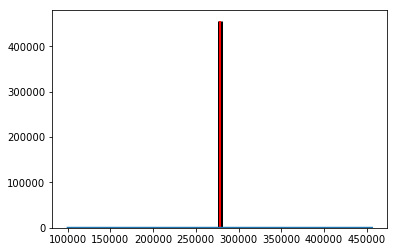


--------------------------------------
excess kurtosis of normal distribution (should be 0): -1.202776512271528
skewness of normal distribution (should be 0): 0.0010628876510595593


AttributeError: 'str' object has no attribute 'fromat'

In [7]:
eda = EDA(bureau_df)
eda.explore()

In [14]:
#reduce memory foot print
bureau_df=dp.reduce_mem_usage(bureau_df)

#fill missing values
bureau_df = dp.fill_numeric (bureau_df,0)
# bureau_df = dp.fill_categorical (bureau_df,'most_frequent')

Memory usage of dataframe is 222.62 MB
Memory usage of dataframe after memory optimization is 112.95 MB


In [15]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,0.0
3,215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,0.0


In [16]:
bureau_df.to_csv(Processed+"bureau.csv", index=False)
del bureau_df
gc.collect()

775

## bureau_balance.csv

In [17]:
bureau_balance_df = pd.read_csv(PATH+"bureau_balance.csv")
dp.basic_info(bureau_balance_df)
dp.dataFrame_size_MB(bureau_balance_df)
bureau_balance_df.head()

Num of rows and columns:  (27299925, 3)
Missing value status:  False
Columns names:
 
SK_ID_BUREAU
MONTHS_BALANCE
STATUS


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
#reduce memory foot print
bureau_balance_df=dp.reduce_mem_usage(bureau_balance_df)

Memory usage of dataframe is 624.85 MB
Memory usage of dataframe after memory optimization is 338.46 MB


In [19]:
#check unique values in STATUS column
bureau_balance_df.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [20]:
bureau_balance_df.drop(['MONTHS_BALANCE'], axis=1,inplace=True)
#replace all non numeric values to 0
bureau_balance_df['STATUS'] = bureau_balance_df.STATUS.apply(lambda x: x if dp.is_number(x) else '0')
bureau_balance_df['STATUS']= bureau_balance_df['STATUS'].astype(np.int8)
bureau_balance_df.STATUS.unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [21]:

bureau_balance_agg=bureau_balance_df.groupby(['SK_ID_BUREAU'])['STATUS'].sum() # returns serires with index
bureau_balance_agg.values
bureau_balance_agg_df=pd.DataFrame(data={'STATUS_AGG':bureau_balance_agg.values, 'SK_ID_BUREAU':bureau_balance_agg.index})
bureau_balance_agg_df.head()

,SK_ID_BUREAU,STATUS_AGG
0,5001709,0.0
1,5001710,0.0
2,5001711,0.0
3,5001712,0.0
4,5001713,0.0


In [22]:
bureau_balance_agg_df.to_csv(Processed+"bureau_balance_agg.csv", index=False)
del bureau_balance_df, bureau_balance_agg_df, bureau_balance_agg
gc.collect()

336

# Prepare Final Dataset

In [23]:
#load Bureau datasets
bureau_balance_agg_df = pd.read_csv(Processed+"bureau_balance_agg.csv")
bureau_balance_agg_df.shape

(817395, 2)

In [24]:
bureau_df=pd.read_csv(Processed+"bureau.csv")
bureau_df.shape

(1716428, 17)

In [25]:

#merge Bureau and bureau_balances
merged_bureau_df = pd.merge(left=bureau_df, right=bureau_balance_agg_df, how='left', on= 'SK_ID_BUREAU' )
merged_bureau_df.shape

(1716428, 18)

In [26]:
merged_bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS_AGG
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,0.0,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,0.0,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,0.0,NaN
3,215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,0.0,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,0.0,NaN


In [27]:
del bureau_df, bureau_balance_agg_df
gc.collect()

447

In [28]:
merged_bureau_df = dp.reduce_mem_usage(merged_bureau_df)
merged_bureau_df = dp.fill_numeric(merged_bureau_df,0)
dp.check_missing_data(merged_bureau_df)

Memory usage of dataframe is 248.81 MB
Memory usage of dataframe after memory optimization is 129.32 MB


,Total,Percent
STATUS_AGG,0,0.0
AMT_ANNUITY,0,0.0
SK_ID_BUREAU,0,0.0
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0
DAYS_CREDIT_ENDDATE,0,0.0
DAYS_ENDDATE_FACT,0,0.0
AMT_CREDIT_MAX_OVERDUE,0,0.0


In [29]:
merged_bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS_AGG
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,0.0,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,0.0,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,0.0,0.0
3,215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,0.0,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,0.0,0.0


In [30]:
#check loan counts for each customer
groupby_loans = merged_bureau_df.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
groupby_loans.describe()
#consider last 6 loans for each customer

count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: SK_ID_BUREAU, dtype: float64

In [47]:
#group by SK_ID_CURR and sort by CREDIT_ACTIVE and DAYS_CREDIT
merged_bureau_df.CREDIT_ACTIVE.head() 
# merged_bureau_df[merged_bureau_df.CREDIT_ACTIVE=='Bad debt']


0    Closed
1    Active
2    Active
3    Active
4    Active
Name: CREDIT_ACTIVE, dtype: object

In [5]:
#load application df
app_df = pd.read_csv(Processed+"application.csv")
app_df = dp.reduce_mem_usage(app_df)
app_df.shape

Memory usage of dataframe is 331.60 MB
Memory usage of dataframe after memory optimization is 107.36 MB


(356255, 122)

In [6]:
#one hot encoding
cat_feat=dp.get_categorical_features(app_df)
app_df=dp.onehot_encoding(app_df,cat_feat)

In [ ]:
#save final Dataset
